In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
Data = pd.read_csv("Seshat Data.csv")

In [3]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [4]:
np.median(Data["SPC1"])

0.356081775

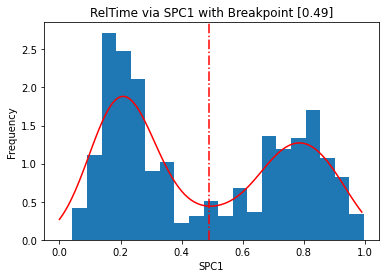

In [5]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


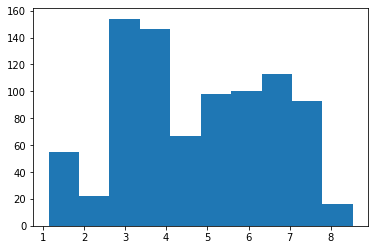

PolTerr


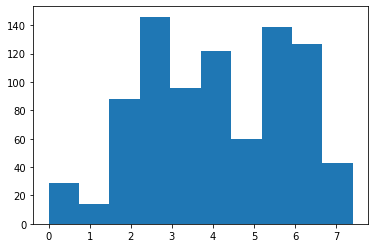

CapPop


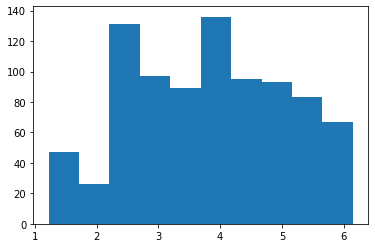

levels


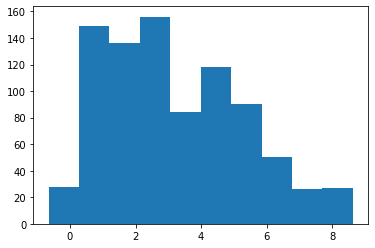

government


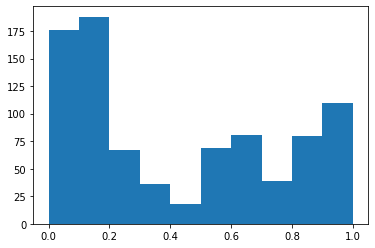

infrastr


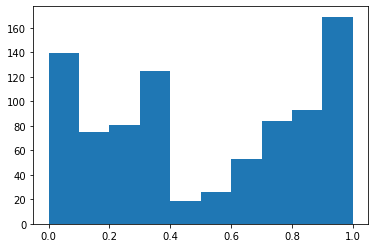

writing


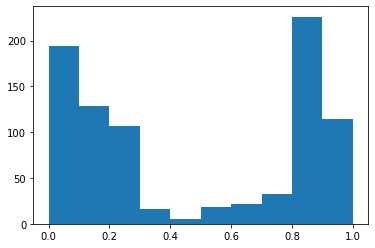

texts


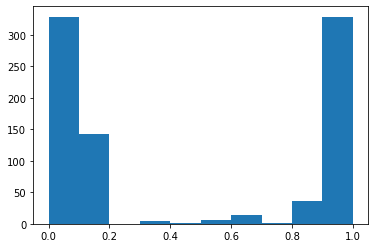

money


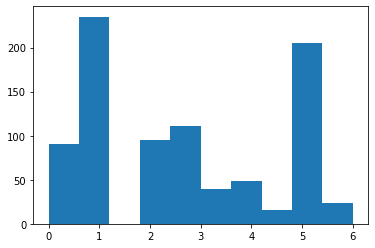

SPC1


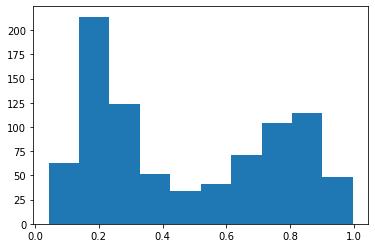

In [6]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [7]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [8]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [9]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Niger Inland Delta large enough? [ True]
Is Lowland Andes large enough? [False]
Is Big Island Hawaii large enough? [False]
Is Ghanaian Coast large enough? [ True]
Is Chuuk Islands large enough? [False]
Is Latium large enough? [ True]
Is Oro PNG large enough? [False]
Is Konya Plain large enough? [ True]
Is North Colombia large enough? [False]
Is Upper Egypt large enough? [ True]
Is Deccan large enough? [ True]
Is Cambodian Basin large enough? [ True]
Is Central Java large enough? [ True]
Is Southern China Hills large enough? [False]
Is Valley of Oaxaca large enough? [False]
Is Susiana large enough? [ True]
Is Paris Basin large enough? [ True]
Is Cuzco large enough? [ True]
Is Garo Hills large enough? [False]
Is Cahokia large enough? [False]
Is Kachi Plain large enough? [ True]
Is Iceland large enough? [ True]
Is Kansai large enough? [ True]
Is Lena River Valley large enough? [False]
Is Orkhon Valley large enough? [ True]
Is Sogdiana large enough? [ True]
Is Yemeni Coastal Plain la

In [10]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [11]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)

for NGA in list(set(Seshat_Large["NGA"])):
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    Data_RT = pd.concat([Data_RT, NGA_dat])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Niger Inland Delta 1000
     Time      SPC1
490 -1200  0.098110
491 -1100  0.098110
492 -1000  0.098110
493  -900  0.201994
494  -800  0.201994
495  -700  0.201994
496  -600  0.302212
497  -500  0.302212
498  -400  0.302212
499  -300  0.302212
500  -200  0.302212
501  -100  0.378760
502     0  0.552919
503   100  0.707378
504   200  0.707378
505   300  0.718475
506   400  0.720930
507   500  0.767729
508   600  0.816770
509   700  0.816770
510   800  0.751563
 ________________________ 
Kachi Plain -2500
     Time      SPC1
129 -5000  0.157368
130 -4900  0.157368
131 -4800  0.157368
132 -4700  0.157368
133 -4600  0.157368
..    ...       ...
218  3900  0.710320
219  4000  0.715172
220  4100  0.847881
221  4200  0.894917
222  4300  0.691778

[94 rows x 2 columns]
 ________________________ 
Deccan -300
     Time      SPC1
76  -2400  0.155157
77  -2300  0.155157
78  -2200  0.155157
79  -2100  0.155157
80  -2000  0.155157
81  -1900  0.155157
82  -1800  0.155157
83  -1700  0.155157
84  -1600

C:\Users\Tobias\AppData\Local\Temp/ipykernel_20004/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_20004/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_20004/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [12]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
490,Niger Inland Delta,MlJeJe1,-1200,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.900000,0.098110,0
491,Niger Inland Delta,MlJeJe1,-1100,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.900000,0.098110,0
492,Niger Inland Delta,MlJeJe1,-1000,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.900000,0.098110,0
493,Niger Inland Delta,MlJeJe2,-900,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.900000,0.201994,0
494,Niger Inland Delta,MlJeJe2,-800,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.900000,0.201994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Susiana,IrIlkhn,5000,6.720159,6.579784,5.160659,5.501420,0.709091,0.987500,0.828571,1.0000,2.934952,0.818716,1
754,Susiana,UzTimur,5100,7.690196,6.740363,5.176091,6.115642,0.827273,0.881818,0.828571,0.9875,5.000000,0.872746,1
755,Susiana,IrAkKoy,5200,6.766649,6.255273,4.880255,5.092885,0.744444,0.850000,0.828571,0.9625,5.000000,0.812770,1
756,Susiana,IrSafvd,5300,6.954243,6.431364,5.301030,5.530021,0.809091,0.825000,0.842857,1.0000,5.000000,0.839888,1


## Comparison

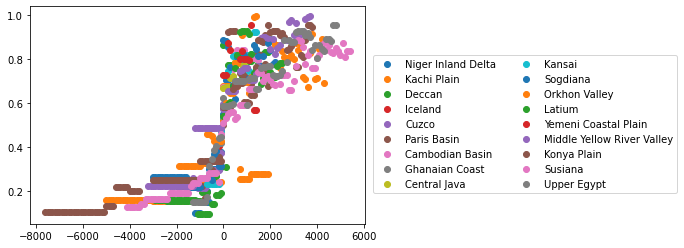

In [13]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

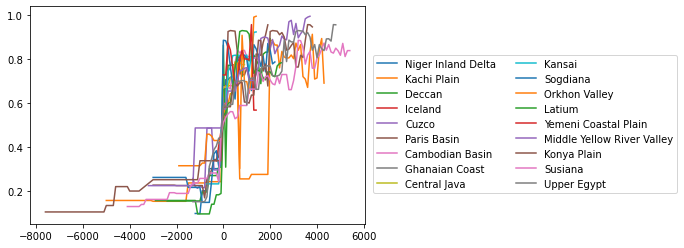

In [14]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [15]:
import scipy.optimize as opt


In [16]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

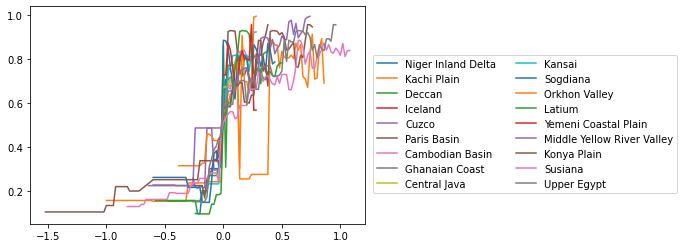

In [17]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [18]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [19]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641014e-01  1.93784865e-01  1.93749263e+01 -1.54321365e-02]


In [20]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410139777263 0.19378486504299167 19.374926256052756 -0.01543213648274149
-1.52 1.2600000000000025


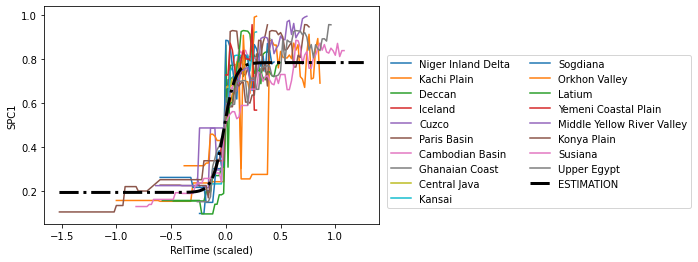

In [21]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

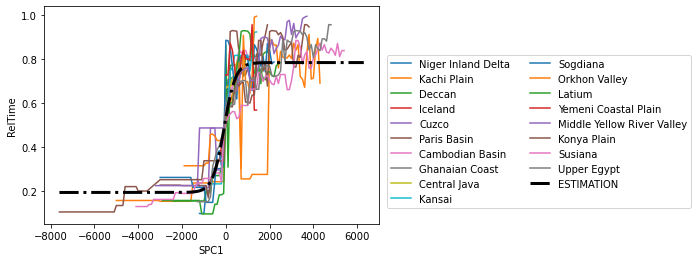

In [22]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("RelTime")
plt.xlabel("SPC1")
plt.show()

#### Residuals

In [23]:
y_est = f(X,a_, b_, c_, d_)

In [24]:
RMSE = (np.sum((y_est-y)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583117147


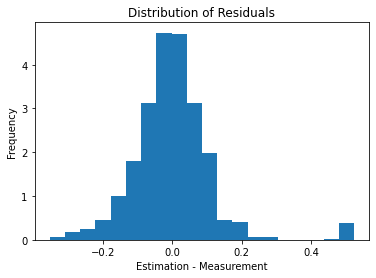

In [25]:
plt.hist(y_est-y,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [26]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [27]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.5913237971403582 0.1889996808305756 16.39957584006267 -0.014785689123149238
-----------------
0.5212882762928673 0.2183864351447697 51.17794103749582 -0.01684055681983764
-----------------
0.5941394954086542 0.1958456162681982 31.402291896953326 -0.01456847035843659
-----------------
0.7363909938163881 0.1641707220069216 7.273044417411419 -0.01261370320206887
-----------------
0.654970655478397 0.19887994643877532 11.041142889499337 -0.0031436767523864303
-----------------
0.562708733824528 0.1866199912650825 27.111949901135564 -0.014132756972247062
-----------------
0.6029904502207463 0.19686119468846405 22.513693126010594 -0.008472031185344944
-----------------
0.5658003967234194 0.1946827397162449 29.164417678281193 -0.017203293267469298
-----------------
0.680536729738123 0.15667174435650436 8.436719466639351 0.0023310177157638036
-----------------
0.5697975536806555 0.1946740335096406 48.0837141878779 -0.014885333335226868
-----------------
0.6137061979572564 0.1775694622437359 

0.5941719595391809 0.18758755277674413 23.96159758401782 -0.011502401196038745
-----------------
0.5958778344096797 0.1774614617347247 28.362453733931076 -0.012724871777493986
-----------------
0.6114638371750404 0.19042203652626252 16.85410318951173 -0.018146529918538237
-----------------
0.5727546247287715 0.1949947623836211 36.46233997419753 -0.01440335840249333
-----------------
0.6527135621129906 0.17909214497923423 9.53451360989247 -0.01737581530406221
-----------------
0.6395671721263395 0.17750092563367756 10.94479252577101 -0.015609308561227645
-----------------
0.6063062067994875 0.1924891708057041 17.209717903397827 -0.011279826581484494
-----------------
0.6001065208685638 0.17644909026379138 17.53954603736836 -0.012363741269284434
-----------------
0.5585247578238307 0.20284875986229528 24.758198264145285 -0.016892501208639974
-----------------
0.5991773481510728 0.20349762756607484 18.440067029143638 -0.01237433966945794
-----------------
0.590628968991901 0.2014788543162

0.640099846062315 0.17175884327640448 10.617326158603134 -0.009324543989839083
-----------------
0.6366616162076251 0.17964431256059968 10.593079265419581 -0.022560039373456575
-----------------
0.5910839953489584 0.19191274914848505 24.949154075234524 -0.012356582505278423
-----------------
0.6550422888587227 0.19517493452617338 12.846540534317002 -0.010863954621204475
-----------------
0.5849796105995385 0.20601867449828629 22.493855888188953 -0.016746184208855056
-----------------
0.569273164833759 0.2016391491042398 22.058614419250517 -0.02331130670282468
-----------------
0.5869854118743254 0.22450526968362947 20.175471280269754 -0.006395370859715135
-----------------
0.6202403814425055 0.1973109124537445 17.485831108178417 -0.014674185167972132
-----------------
0.5914498198948597 0.20906655062479787 20.974228096340386 -0.007387009214870012
-----------------
0.5745382451624811 0.19365224661143152 22.76734342563027 -0.02420952633097766
-----------------
0.6850700798669194 0.156639

0.5863371650444258 0.19980631469197235 20.042657090162717 -0.020203304411932264
-----------------
0.6609760912435999 0.1495911338405412 6.715118638474139 -0.010886371490135561
-----------------
0.5375867837574809 0.21803613948023115 65.05557291102319 -0.017620357413572953
-----------------
0.5942198065671761 0.17848150674407387 29.082456183479668 -0.010893852663926173
-----------------
0.6622584565355055 0.1666710810795298 7.730000467756346 -0.007306350979126481
-----------------
0.6625154911986422 0.1637336326761954 8.373981389626104 -0.002209907862524251
-----------------
0.6489447304245126 0.1764774977115926 8.906434336331085 -0.016646630562103085
-----------------
0.5882471275166363 0.18918573386521018 22.83044162449647 -0.010231830138249784
-----------------
0.6705902753816253 0.15335811609746733 7.173926975296038 -0.017167825793878017
-----------------
0.6048482485592334 0.2026218827253055 25.166899894463814 -0.011194216268380793
-----------------
0.6112523037196683 0.18590292369

0.5379110943337262 0.21417805090266673 39.129392221789296 -0.011954377623137988
-----------------
0.6469762029082577 0.17468629088197993 13.372545112526645 -0.015571359801723708
-----------------
0.5927411871878793 0.1761888443963522 30.266190746023465 -0.018601860861391425
-----------------
0.6269105479516809 0.18964126942518147 28.249557662791887 -0.00626843224512272
-----------------
0.5398653481066329 0.20534353276703826 25.36286477866157 -0.01819733184413921
-----------------
0.6430170638797235 0.18990687670406903 12.692722575115114 -0.009396312401381942
-----------------
0.5896418860177997 0.18886902599183333 18.47423977698076 -0.018538964648981963
-----------------
0.5922059843591939 0.17947747660941438 28.45358995569405 -0.011562987823381684
-----------------
0.6388462184917717 0.1562736696720834 8.224119507299841 -0.0060143085669153076
-----------------
0.5709014701886244 0.20532763759520192 23.95008729627334 -0.016222805836494273
-----------------
0.7014787698649867 0.1477653

0.6747425887818399 0.16668847532276912 10.241313203262106 -0.000795554624524119
-----------------
0.5703628708301923 0.1943384098553147 20.345278582298132 -0.019534573864294743
-----------------
0.5939632570237326 0.18990929863964093 25.42240201275168 -0.009165946656030677
-----------------
0.6012660790663692 0.19418730988343183 14.908287315839962 -0.014554338155358221
-----------------
0.5959377130408817 0.2327668798562343 20.10195846243386 -0.009679392121615506
-----------------
0.6020033938716459 0.21060847920802458 21.869199886693274 -0.012473240128227878
-----------------
0.5905145431939637 0.18974600511667725 20.98854927471217 -0.010336401777850711
-----------------
0.5974847525246074 0.17822941171416504 19.357893806360465 -0.01507751759970165
-----------------
0.6043119089118214 0.19602059435410674 16.546994839434966 -0.01974188111639252
-----------------
0.5844123625160539 0.21276183403899415 40.42396324943989 -0.01252695128797412
-----------------
0.5509358070192065 0.23613526

0.5407678203706409 0.20530439902274056 43.03442075145672 -0.01798731119576299
-----------------
0.6378869561797131 0.1929648495939296 11.496345336860692 -0.01162928892460059
-----------------
0.6029514973662897 0.1763801913290706 17.44798064255982 -0.01017526769465891
-----------------
0.6144142907127783 0.20550333704998056 22.723173229013405 -0.012502647594454472
-----------------
0.6182164299150498 0.16852120610076374 21.28290749754595 -0.014862764883208887
-----------------
0.5368925076313165 0.20258539516602841 54.0269177740374 -0.019012332785626387
-----------------
0.5878347066312125 0.20027129624608828 22.48196667939989 -0.015580346205276166
-----------------
0.5767648506821581 0.1965779974413557 36.811045619392914 -0.008243406602521925
-----------------
0.5486416373504291 0.21341625468932113 26.035891109688293 -0.01536801941374902
-----------------
0.567907817522493 0.2004196559466885 18.389376490878412 -0.013224799827350744
-----------------
0.5646742522583375 0.20041192502962

0.6017458440889836 0.18709887113938264 24.840903221174386 -0.011969413544551622
-----------------
0.5715278876092336 0.2135140111582794 24.189418957650194 -0.01454404920609115
-----------------
0.6140753224356047 0.17379663604417012 14.629041762567818 -0.018882416610311405
-----------------
0.5551067200598657 0.20193304008746324 27.096440372724665 -0.015024310427129112
-----------------
0.6746782151145932 0.16401174006995736 9.451344909357985 -0.008353090512358845
-----------------
0.625305044783584 0.18031649864588445 11.320629981445732 -0.006427545717864178
-----------------
0.6071483690695149 0.17715220406095958 27.053415985464554 -0.012113608624223168
-----------------
0.6020656607192086 0.1841374541120986 13.170729600995795 -0.015108386156485343
-----------------
0.6479567836139908 0.1806959215766607 8.418597077749281 -0.02223568502280778
-----------------
0.5724251249772874 0.20413926716203887 23.939288802585256 -0.01143491177209573
-----------------
0.5722301847683939 0.21245503

0.6087950871096296 0.19381208907606282 35.27758433149834 -0.008858646538556524
-----------------
0.6406769270441688 0.18416991940445582 13.704181710185814 -0.0023400897067418543
-----------------
0.6043218783501958 0.20873588664502699 21.85454771678606 -0.006239398446654579
-----------------
0.5782548857010775 0.20575626133428393 21.56765560972625 -0.018399037152028855
-----------------
0.6557742535932822 0.16456250134773273 8.284507349792447 -0.01601188131222423
-----------------
0.6373802496982051 0.16986819281123947 11.521255869657141 -0.012216617347489045
-----------------
0.6711202212416527 0.14818597192086402 6.975461493934343 0.010769028577832757
-----------------
0.5469992203474477 0.2039478527292492 47.81849403942381 -0.015680509290653927
-----------------
0.6603448789742579 0.1543862570311408 8.05138949786598 -0.022429539393732382
-----------------
0.5729518740968748 0.20771454118426091 18.106362567155756 -0.026862805812041556
-----------------
0.6098284417964436 0.1884691156

0.5428310332825612 0.19990396711823236 28.92790266140915 -0.019541191892411203
-----------------
0.5849212634256418 0.1803651531307703 13.725243753342422 -0.01835421589642974
-----------------
0.6529319233337123 0.1890177885010656 15.47300824698237 -0.004099196276702399
-----------------
0.6003690609146868 0.179882171364616 17.68281731220658 -0.01019345008969919
-----------------
0.5918470202649312 0.19230323670038865 30.867359163432376 -0.009566112935427777
-----------------
0.6098550998608047 0.18748179598682646 27.769183339785773 -0.009431031390992448
-----------------
0.601226061157573 0.18924412823786937 24.61307740015061 -0.013822188824917625
-----------------
0.6428777340518913 0.15913602093488255 8.414498016967453 -0.0065065541202722
-----------------
0.6046883254359906 0.21364400252764273 17.77167191426257 -0.008855183697832593
-----------------
0.6256568723169614 0.18767078000571108 15.207055086672163 -0.01259854846231937
-----------------
0.583391046156455 0.2039209970804801

0.5935785989773058 0.21177431451199205 25.663453560791275 -0.011881294373404022
-----------------
0.5707380795641923 0.19630890253646596 23.74239642288271 -0.01805886652108168
-----------------
0.6292728960897881 0.19657645657966286 15.487793746985632 -0.00891985790989679
-----------------
0.6214353647045471 0.1940698739756291 14.839103193408299 -0.014349573688963977
-----------------
0.5932430575178768 0.2095825896872107 15.862240522293849 -0.015212160865047317
-----------------
0.6005541331940429 0.1947077387234089 26.239493813779422 -0.013237654955236688
-----------------
0.6238703781205901 0.17090357685861038 11.912516059704345 -0.015651841542357076
-----------------
0.6143811380403429 0.19932017727295961 14.581560157264088 -0.013505331150529837
-----------------
0.5693504718419589 0.19755553625381927 20.876612931331483 -0.01936822417693128
-----------------
0.6307141996013516 0.18327165099585624 11.923704124600725 -0.02257918914867784
-----------------
0.6367858419000966 0.1709038

0.6374296722469341 0.16450369371211027 9.980014405201276 -0.013487288659017159
-----------------
0.6169546875320839 0.17715117384327053 24.591506749996892 -0.0023564010707205125
-----------------
0.6226047783771065 0.16899676263679153 11.555412561625918 -0.011710351476533288
-----------------
0.5699203908806193 0.21384734215887888 27.51018880527803 -0.013899742039006494
-----------------
0.6386407692770822 0.18381324190480022 15.573913122500446 -0.006208663229773263
-----------------
0.5943904346986152 0.2182657387822858 16.991617168241902 -0.007572098235218731
-----------------
0.558758999383111 0.19329344976486307 38.41551565789312 -0.015559575524120586
-----------------
0.6868390348146277 0.17267757214011906 8.610999484898686 -0.01060960962308662
-----------------
0.5406946028880721 0.20149857713979072 34.23230137180773 -0.014178339638146817
-----------------
0.5655734916877979 0.20872840437858728 33.34927165947005 -0.015500237031850706
-----------------
0.6122168775059983 0.1881675

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [28]:
print(negCcount)

0


In [29]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

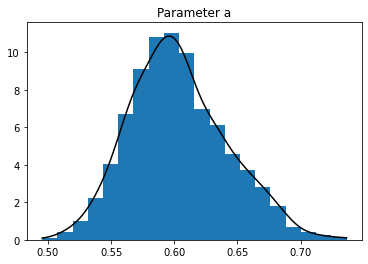

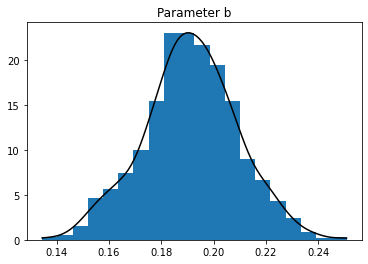

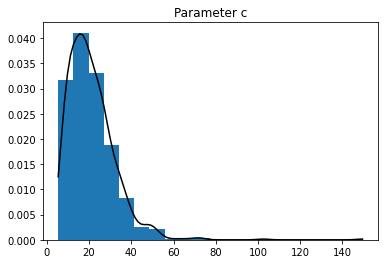

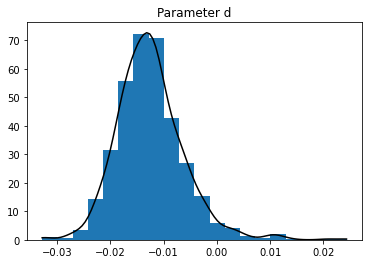

In [30]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [41]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.19116029473073257 0.017968971406062868
0.7943651185253561 0.029661953007649077
0.20912926613679544 0.764703165517707
0.1937848650431211 0.785425878662103


In [52]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

opt.root(f1, -0.5)

    fjac: array([[-1.]])
     fun: array([-1.94289029e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([5.18272092e-11])
       r: array([-0.28958718])
  status: 1
 success: True
       x: array([-0.20257462])

In [59]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_20004/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


    fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([8.89854856e-12])
       r: array([-0.38743772])
  status: 1
 success: True
       x: array([0.15571771])

### Cross-Validation